In [6]:
include("sym_cliff.jl")

function phi_sim(N, n_step, r, p, sym)
    gate = mixed_gate(r, p, sym)
    state = all_plus(N)

    result = []
    for t in 1:n_step
        push!(result, cal_phi(state, true))

        for i in 1:2:(N-1)
            gate(state, i, i+1)
        end

        for i in 2:2:(N-1)
            gate(state, i, i+1)
        end
    end
    
    return result
end


function ee_sim(N, n_step, r, p, sym)
    gate = mixed_gate(r, p, sym)
    state = all_plus(N)

    result = []
    for t in 1:n_step
        push!(result, bipartite_entropy(state))

        for i in 1:2:(N-1)
            gate(state, i, i+1)
        end

        for i in 2:2:(N-1)
            gate(state, i, i+1)
        end
    end
    
    return result
end


function both_sim(N, n_step, r, p, sym)
    gate = mixed_gate(r, p, sym)
    state = all_plus(N)

    result1 = []
    result2 = []
    for t in 1:n_step
        push!(result1, cal_phi(state, true))
        push!(result2, bipartite_entropy(state))

        for i in 1:2:(N-1)
            gate(state, i, i+1)
        end

        for i in 2:2:(N-1)
            gate(state, i, i+1)
        end
    end
    
    return result1, result2
end

both_sim (generic function with 1 method)

## Gate ensemble description
On each bond at each time step：
* With probability $r$, apply a random (symmetric or not) clifford gate. 
* With probability $(1-r)p$, apply a X measurement.
* With probability $(1-r)(1-p)$, apply a ZZ measurement

## Transient behavior

### Behavior of $\Phi$

100 200 300 

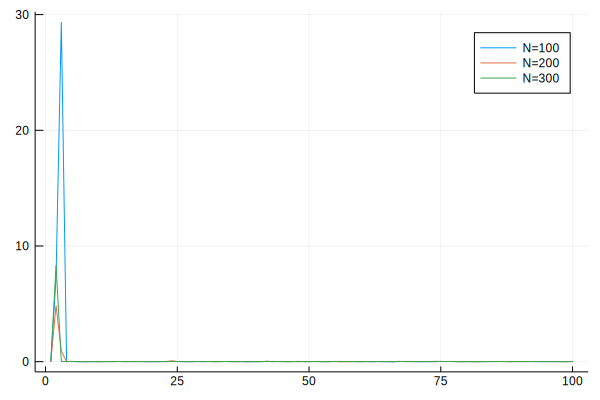

In [76]:
r = 0.1
p = 1
sym = false
n_step = 100

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = phi_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

100 200 300 

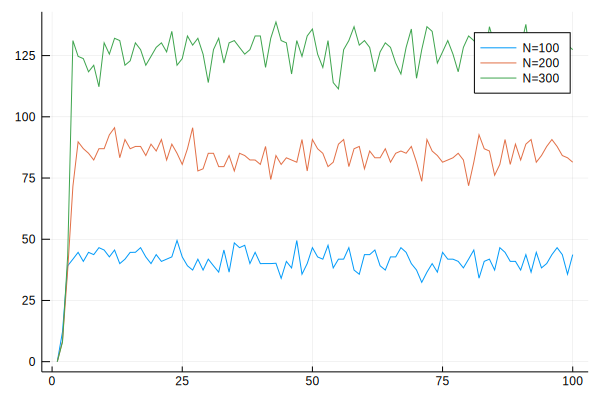

In [69]:
r = 0.1
p = 1
sym = true
n_step = 100

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = phi_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

100 200 300 

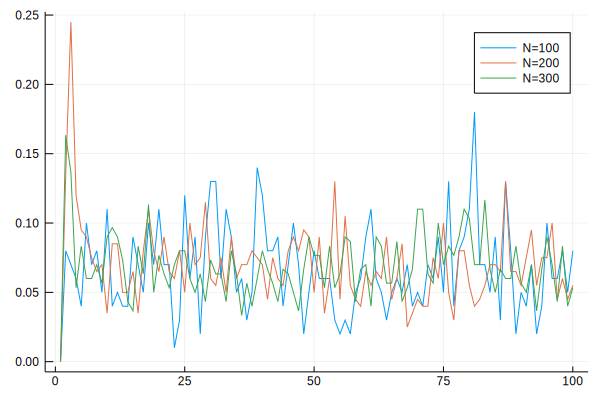

In [71]:
r = 0.9
p = 1
sym = true
n_step = 100

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = phi_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

### Behavior of entanglement entropy

100 200 300 

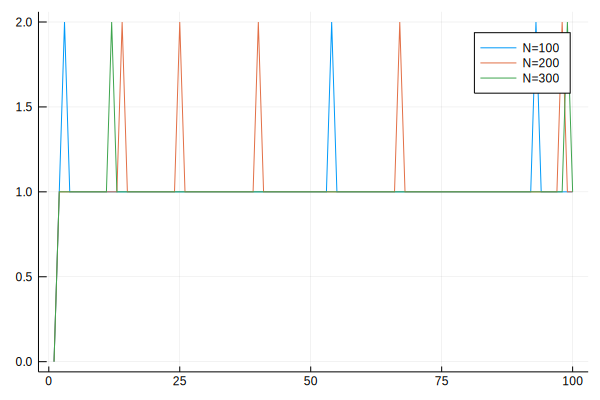

In [72]:
r = 0.1
p = 1
sym = true
n_step = 100

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = ee_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

In [3]:
r = 0.9
p = 1
sym = true
n_step = 250

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = ee_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

100 

InterruptException: InterruptException:

100 200 300 

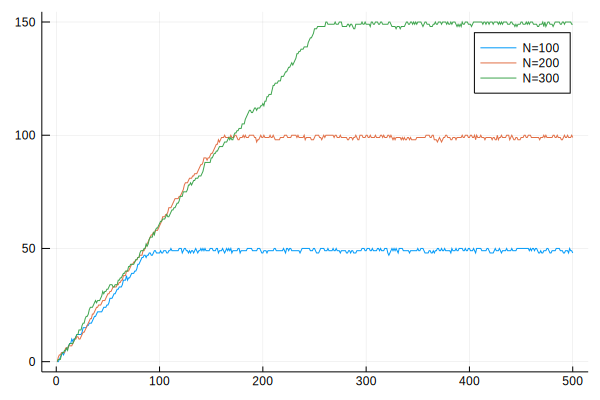

In [75]:
r = 1
p = 1
sym = true
n_step = 500

plot()
for N in [100, 200, 300]
    print(N, ' ')
    result = ee_sim(N, n_step, r, p, sym)
    
    plot!(result, label=string("N=", N))
end
plot!()

## Equilibrium values

### $\Phi$

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 

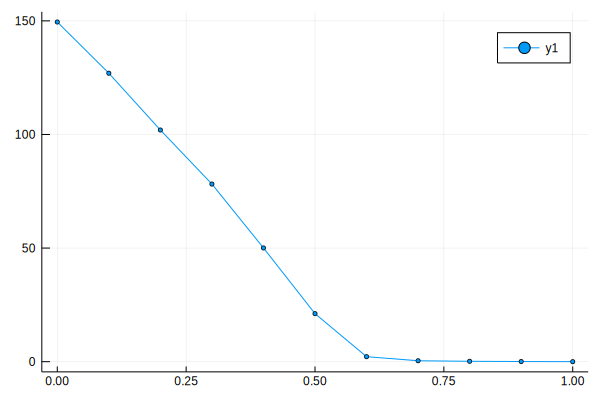

In [78]:
N = 300
n_step = 600
r_list = 0:0.1:1
p = 1
sym = true

stable_values  = []

for r in r_list
    print(r, ' ')
    result = phi_sim(N, n_step, r, p, sym)
    push!(stable_values, sum(result[N+1:end]) / (n_step - N))
end

plot(r_list, stable_values, marker=2)

### $entropy$

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 

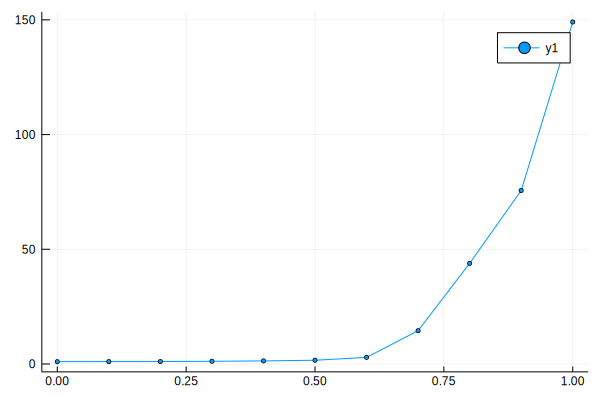

In [84]:
N = 300
n_step = 400
r_list = 0:0.1:1
p = 1
sym = true

stable_values  = []

for r in r_list
    print(r, ' ')
    result = ee_sim(N, n_step, r, p, sym)
    push!(stable_values, sum(result[N+1:end]) / (n_step - N))
end

plot(r_list, stable_values, marker=2)

### $\Phi$ and entropy

In [86]:
N = 300
n_step = 600
r_list = 0.5:0.01:0.6
p = 1
sym = true

stable_values1  = []
stable_values2  = []

for r in r_list
    print(r, ' ')
    result1, result2 = both_sim(N, n_step, r, p, sym)
    push!(stable_values1, sum(result1[N+1:end]) / (n_step - N))
    push!(stable_values2, sum(result2[N+1:end]) / (n_step - N))
end

plot!()
plot(r_list, stable_values1, marker=2)
plot(r_list, stable_values2, marker=2)

0.5 0.51

InterruptException: InterruptException:

In [7]:
using Profile
function main(r)
    p = 1
    sym = true
    n_step = 300

    plot()
    for N in [500]
        print(N, ' ')
        result = ee_sim(N, n_step, r, p, sym)

        plot!(result, label=string("N=", N))
    end
    plot!()
end


main (generic function with 1 method)

500  47.297919 seconds (179.91 M allocations: 16.551 GiB, 7.05% gc time)


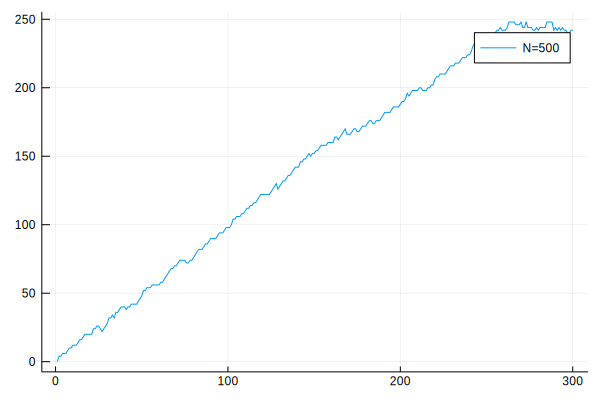

In [11]:
@time main(0.9)

500  82.740656 seconds (214.08 M allocations: 64.113 GiB, 10.27% gc time)


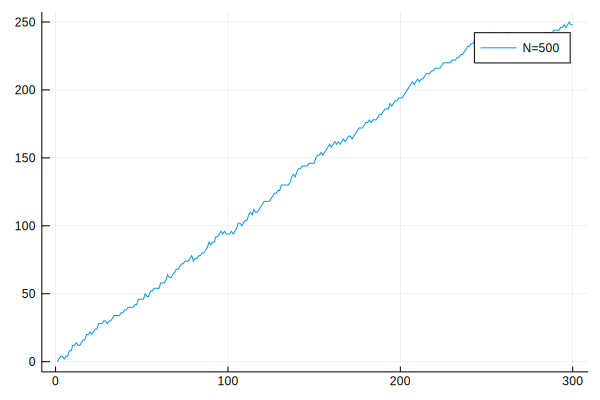

In [16]:
@time main(0.2)
@time main(0.4)
@time main(0.6)
@time main(0.7)
@time main(0.8)
@time main(0.9)

500 

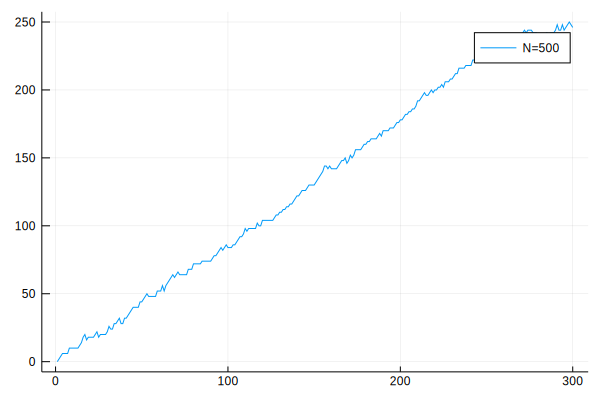

In [9]:
Profile.clear()
@profile main(0.9)

In [10]:
Profile.print()

15497 .\task.jl:268; (::getfield(IJulia, Symbol("##15#...
 15497 ...RegO\src\eventloop.jl:8; eventloop(::ZMQ.Socket)
  15497 .\essentials.jl:789; invokelatest
   15497 .\essentials.jl:790; #invokelatest#1
    15496 ...\execute_request.jl:67; execute_request(::ZMQ.Socket, :...
     15496 ...\SoftGlobalScope.jl:218; softscope_include_string(::Mod...
      15496 .\boot.jl:330; eval
       15496 .\In[7]:10; main(::Float64)
        7     .\In[6]:26; ee_sim(::Int64, ::Int64, ::Fl...
         7 ...ds.jl\src\cliff5.jl:125; all_plus
          7 .\none:0; (::getfield(Base, Symbol("#kw##...
           7 .\abstractarray.jl:1565; #cat#106(::Int64, ::typeof(c...
            7 ...c\sparsevector.jl:1078; _cat(::Int64, ::Array{Paulis...
             7 .\none:0; (::getfield(Base, Symbol("#kw...
              7 .\abstractarray.jl:1438; #cat_t#105(::Int64, ::typeo...
               5 .\abstractarray.jl:1441; _cat_t(::Int64, ::Type, ::...
                5 .\abstractarray.jl:1396; cat_shape(::Tuple{Bool,Bo

                                   +103 3 ...ray.jl:1396; cat_shape(:...
                                   +104 3 ...ray.jl:1396; cat_shape(:...
                                   +105 3 ...ray.jl:1396; cat_shape(:...
                                   +106 3 ...ray.jl:1396; cat_shape(:...
                                   +107 3 ...ray.jl:1396; cat_shape(:...
                                   +108 3 ...ray.jl:1396; cat_shape(:...
                                   +109 3 ...ray.jl:1396; cat_shape(:...
                                   +110 3 ...ray.jl:1396; cat_shape(:...
                                   +111 3 ...ray.jl:1396; cat_shape(:...
                                   +112 3 ...ray.jl:1396; cat_shape(:...
                                   +113 3 ...ray.jl:1396; cat_shape(:...
                                   +114 3 ...ray.jl:1396; cat_shape(:...
                                   +115 3 ...ray.jl:1396; cat_shape(:...
                                   +116 3 ...ray.jl

                                   +244 1 ...ray.jl:1396; cat_shape(:...
                                   +245 1 ...ray.jl:1396; cat_shape(:...
                                   +246 1 ...ray.jl:1396; cat_shape(:...
                                   +247 1 ...ray.jl:1396; cat_shape(:...
                                   +248 1 ...ray.jl:1396; cat_shape(:...
                                   +249 1 ...ray.jl:1396; cat_shape(:...
                                   +250 1 ...ray.jl:1396; cat_shape(:...
                                   +251 1 ...ray.jl:1396; cat_shape(:...
                                   +252 1 ...ray.jl:1396; cat_shape(:...
                                   +253 1 ...ray.jl:1396; cat_shape(:...
                                   +254 1 ...ray.jl:1396; cat_shape(:...
                                   +255 1 ...ray.jl:1396; cat_shape(:...
                                   +256 1 ...ray.jl:1396; cat_shape(:...
                                   +257 1 ...ray.jl

            8    ...\binary_linalg.jl:0; binary_uppertrianglize!(::A...
            19   ...\binary_linalg.jl:11; binary_uppertrianglize!(::A...
             1 .\array.jl:0; getindex
             8 .\array.jl:729; getindex
            1    ...\binary_linalg.jl:19; binary_uppertrianglize!(::A...
             1 .\array.jl:859; push!
              1 .\array.jl:811; _growend!
            3    ...\binary_linalg.jl:22; binary_uppertrianglize!(::A...
             3 .\array.jl:859; push!
              3 .\array.jl:811; _growend!
            190  ...\binary_linalg.jl:24; binary_uppertrianglize!(::A...
             98 .\abstractarray.jl:981; getindex
              98 ...ltidimensional.jl:670; _getindex
               3  ...tidimensional.jl:681; _unsafe_getindex(::IndexLi...
               17 ...tidimensional.jl:682; _unsafe_getindex(::IndexLi...
                17 .\abstractarray.jl:627; similar
                 17 .\array.jl:318; similar
                  17 .\boot.jl:413; Type
                

             27 .\broadcast.jl:1002; copy
              27 .\ntuple.jl:42; ntuple
               27 .\broadcast.jl:1002; #19
                27 .\broadcast.jl:598; _broadcast_getindex
                 27 .\broadcast.jl:625; _broadcast_getindex_evalf
                  27 ...l\src\cliff5.jl:49; *
                   15 .\Enums.jl:186; Type
                   12 .\int.jl:317; xor
          14 ...s.jl\src\cliff5.jl:113; cliff2_action(::NTuple{6,Tupl...
           13 .\subarray.jl:289; setindex!
            13 .\array.jl:766; setindex!
         913 ...l\src\sym_cliff.jl:109; (::getfield(Main, Symbol("#tm...
          17  .\simdloop.jl:0; ZZ_measurement!(::Array{Pauli...
          1   .\simdloop.jl:75; ZZ_measurement!(::Array{Pauli...
          20  ...l\src\sym_cliff.jl:58; ZZ_measurement!(::Array{Pauli...
           20 .\array.jl:604; collect
            2  .\array.jl:666; grow_to!(::Array{Int64,1}, :...
             2 .\generator.jl:44; iterate
              2 .\iterators.jl:429; iterate
  

             1 .\broadcast.jl:179; Base.Broadcast.Broadcasted{B...
          18 ...jl\src\sym_cliff.jl:38; Z2_2clifford()
         126 ...l\src\sym_cliff.jl:104; (::getfield(Main, Symbol("#tm...
          3  .\Enums.jl:0; cliff2_action(::NTuple{6,Tupl...
          2  .\abstractarray.jl:0; cliff2_action(::NTuple{6,Tupl...
          13 .\abstractarray.jl:503; cliff2_action(::NTuple{6,Tupl...
          7  ...s.jl\src\cliff5.jl:105; cliff2_action(::NTuple{6,Tupl...
          4  ...s.jl\src\cliff5.jl:111; cliff2_action(::NTuple{6,Tupl...
           4 .\subarray.jl:157; view
            4 .\abstractarray.jl:503; checkbounds
          79 ...s.jl\src\cliff5.jl:112; cliff2_action(::NTuple{6,Tupl...
           2  .\subarray.jl:256; getindex
            2 .\abstractarray.jl:503; checkbounds
             1 .\abstractarray.jl:488; checkbounds
              1 .\abstractarray.jl:560; checkindex
               1 .\abstractarray.jl:503; <=
           6  .\subarray.jl:257; getindex
            6 .\array